In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [13]:
df = pd.read_csv('/content/email.csv')

In [14]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='Category', ylabel='count'>

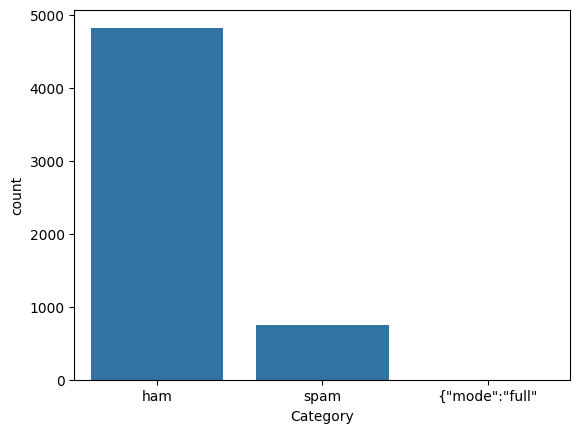

In [16]:
sns.countplot(x='Category', data=df)

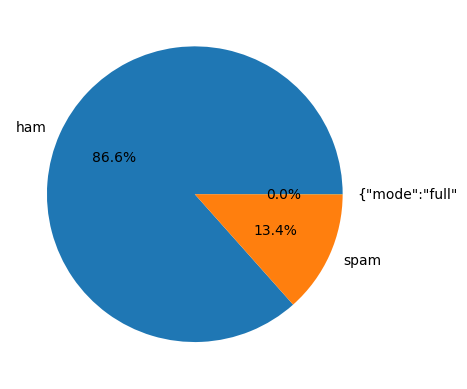

In [17]:
plt.pie(df['Category'].value_counts(), labels=df['Category'].unique(), autopct='%1.1f%%')
plt.show()

In [18]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [19]:
df['Category']

,Category
0,0
1,0
2,1
3,0
4,0
...,...
5568,0
5569,0
5570,0
5571,0


In [20]:
X = df.drop('Category', axis=1)
y = df['Category']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
cv = CountVectorizer()
cv.fit(X_train['Message'])
x_train_v = cv.transform(X_train['Message'])
x_test_v = cv.transform(X_test['Message'])

In [23]:
lr = LogisticRegression()
lr.fit(x_train_v, y_train)

LogisticRegression()

In [24]:
accu = lr.score(x_test_v, y_test)
print(accu)
precision = classification_report(y_test, lr.predict(x_test_v))
print(precision)
confusion_mat = confusion_matrix(y_test, lr.predict(x_test_v))
print(confusion_mat)

0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      0.89      0.94       157

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[957   1]
 [ 18 139]]


<Axes: >

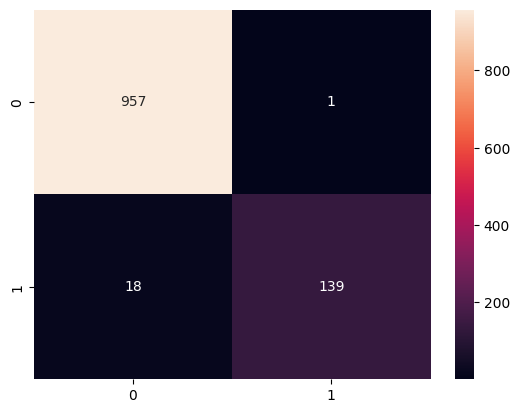

In [25]:
sns.heatmap(confusion_mat, annot=True, fmt='d')

In [26]:
dt = DecisionTreeClassifier( criterion='entropy', max_depth=5 , random_state=42 )
dt.fit(x_train_v, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

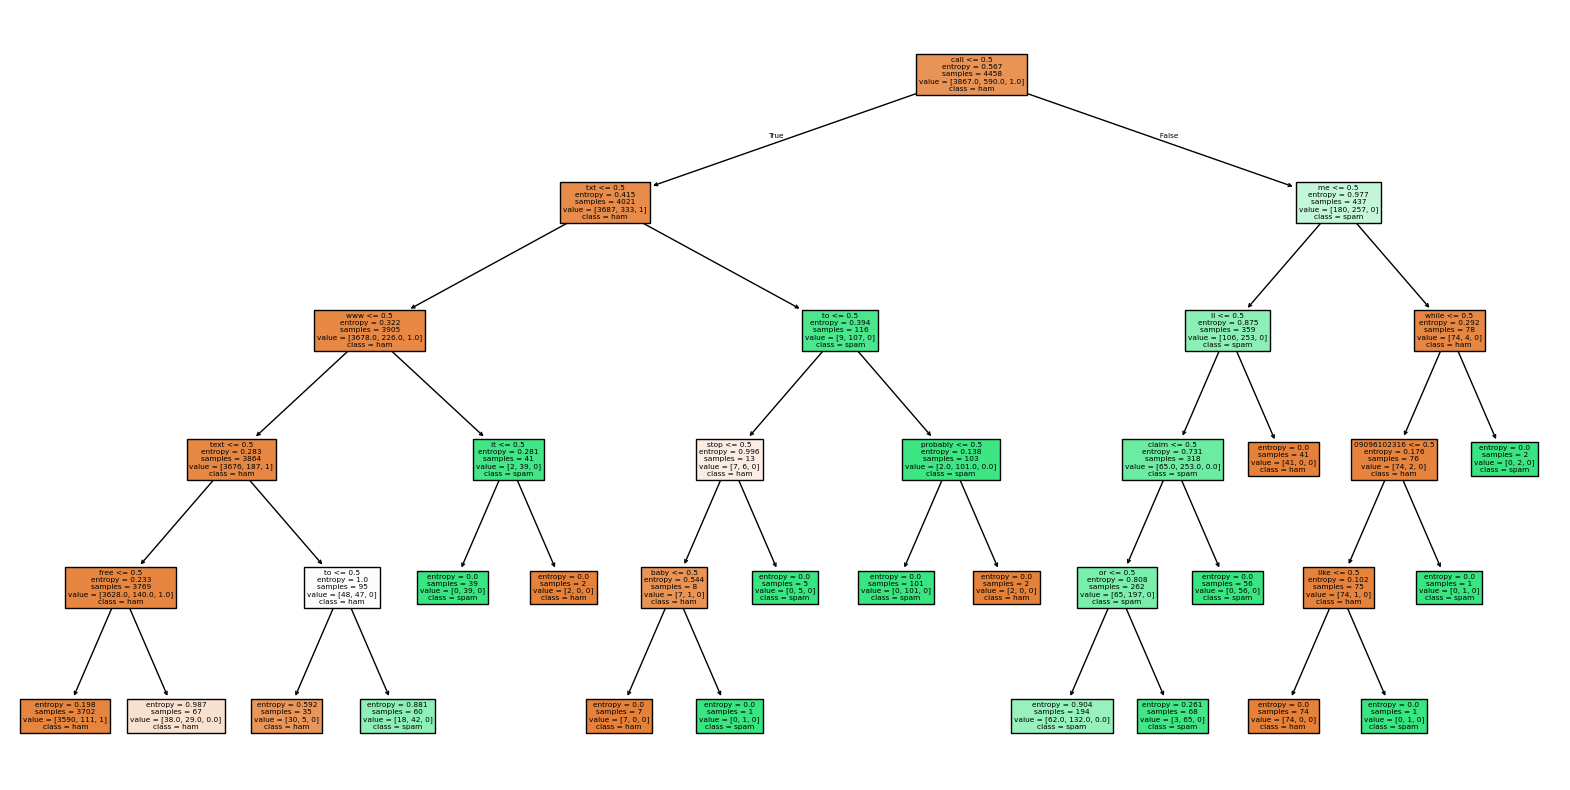

In [27]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=cv.get_feature_names_out(), class_names=['ham', 'spam', 'unknown'])
plt.show()

In [28]:
accu = dt.score(x_test_v, y_test)
print(accu)

precision = classification_report(y_test, dt.predict(x_test_v))
print(precision)

confusion_mat = confusion_matrix(y_test, dt.predict(x_test_v))
print(confusion_mat)


0.9479820627802691
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       958
           1       0.83      0.80      0.81       157

    accuracy                           0.95      1115
   macro avg       0.90      0.88      0.89      1115
weighted avg       0.95      0.95      0.95      1115

[[932  26]
 [ 32 125]]


In [29]:
svm = SVC()
svm.fit(x_train_v, y_train)

SVC()

In [30]:
accu = svm.score(x_test_v, y_test)
print(accu)

precision = classification_report(y_test, svm.predict(x_test_v))
print(precision)

confusion_mat = confusion_matrix(y_test, svm.predict(x_test_v))
print(confusion_mat)

0.9820627802690582
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       1.00      0.87      0.93       157

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[958   0]
 [ 20 137]]


In [34]:
while True:
    user_input = input("Enter an email to classify (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break

user_vector = cv.transform([user_input])
prediction = lr.predict(user_vector)[0]
if prediction == 1:
  print("🛑 This email is likely **SPAM**.\n")
else:
  print("✅ This email looks **NOT SPAM**.\n")

Enter an email to classify (or type 'exit' to quit):  We have got a Black Friday offer you will love! Enjoy a fantastic 35% off all social media growth services at BuySocialMediaMarketing. Simply use code BF35 at checkout, and watch your social media notifications light up in no time! Order Now Here are some of our popular deals: 10,000 Instagram Likes - $50.69 $77.99 25,000 Instagram Followers - $129.99 $199.99 2,500 TikTok Likes - $23.39 $35.99 500 Facebook Post Likes - $3.24 $4.99 Looking for something else? See all services Best regards, BuySocialMediaMarketing To stop receiving our special offers and discounts emails, click here to unsubscribe.
Enter an email to classify (or type 'exit' to quit): exit
✅ This email looks **NOT SPAM**.

